In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import plotly.express as exp

data = pd.read_csv('BX-Users.csv')


#---katharismos tou column location gia na meinei mono h xwra---
for x in range(len(data)):
    my_str = data.loc[x,"location"]
    new_val= my_str[my_str.rfind(','):]
    data.loc[x,"location"] = new_val[1:len(new_val)]
    # clear people above 110 age
    if data.loc[x,"age"] >110:
        data.drop(x,axis=0,inplace=True)

#---katharismos twn countries kathws uphrxan mesa mi uparktes xwres.---
unique_countries = data['location'].unique()
#arxikos arithmos xwrwn
print("Xwres prin to katharisma: ", len(unique_countries))

#---diagrafi twn xwrwn pou emfanizontai ligoteres apo 15 fores kathws opws eidame den einai egkyres
for country in unique_countries:  
    if len(data[data['location'] == country]) < 15 :
        #print(country, "with entries ", len(data[data['location'] == country]), "DROPPED")
        data.drop(data.loc[data['location'] == country].index, inplace = True) 

unique_countries = data['location'].unique()
print("Xwres meta to katharisma: ", len(unique_countries))

#function gia na plottarei tis meses hlikies kathe xwras
def makePlot(number): 

    for x in range(number):
        country = unique_countries[x]
        age18_25 = data[data['location'] == country]['age'][(data[data['location'] == country]['age'] <= 25) & (data[data['location'] == country]['age'] >= 18)]
        age26_35 = data[data['location'] == country]['age'][(data[data['location'] == country]['age'] <= 35) & (data[data['location'] == country]['age'] >= 26)]
        age36_45 = data[data['location'] == country]['age'][(data[data['location'] == country]['age'] <= 45) & (data[data['location'] == country]['age'] >= 36)]
        age46_55 = data[data['location'] == country]['age'][(data[data['location'] == country]['age'] <= 55) & (data[data['location'] == country]['age'] >= 46)]
        age55above = data[data['location'] == country]['age'][data[data['location'] == country]['age'] >= 56]

        x = ["18-25","26-35","36-45","46-55","55+"]
        y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

        plt.figure(figsize=(15,6))
        sns.barplot(x=x, y=y, palette="rocket")
        plt.title(country)
        plt.xlabel("Age")
        plt.ylabel("COUNT OF PEOPLE")
        plt.show()  

#makePlot(5)

print(unique_countries)





Xwres prin to katharisma:  645
Xwres meta to katharisma:  127
[' usa' ' russia' ' portugal' ' united kingdom' ' australia' ' spain'
 ' canada' ' brazil' '' ' germany' ' mexico' ' china' ' italy'
 ' netherlands' ' finland' ' new zealand' ' india' ' ghana' ' france'
 ' switzerland' ' slovenia' ' iran' ' peru' ' bosnia and herzegovina'
 ' vietnam' ' sri lanka' ' pakistan' ' denmark' ' belgium' ' malaysia'
 ' u.a.e' ' turkey' ' philippines' ' greece' ' colombia' ' norway'
 ' kuwait' ' chile' ' taiwan' ' denmark"' ' españa' ' sweden' ' argentina'
 ' nigeria' ' bulgaria' ' austria' ' singapore' ' albania' ' egypt'
 ' uzbekistan' ' qatar' ' saudi arabia' ' indonesia' ' romania' ' poland'
 ' thailand' ' ireland' ' venezuela' ' paraguay' ' morocco' ' afghanistan'
 ' estonia' ' spain"' ' yugoslavia' ' slovakia' ' croatia' ' portugal"'
 ' israel' ' japan' ' iceland' ' south africa' ' cuba' ' puerto rico'
 ' hong kong' ' germany"' ' lithuania' ' costa rica' ' jordan' ' algeria'
 ' andorra' ' panam

In [98]:
# pairnoume mono ta rows pou aforoun mia xwra kai dropparoume tis Nan hlikies -- auto meta tha ginei gia oles tis xwres mia mia
each_country = data.loc[data['location'] == ' usa']
#each_country = each_country.dropna()


#metatropi tis xwras se 1 se ola ta rows gia na mporei na mpei sto montelo
# gia usa mono each_country['location'] = each_country['location'].replace(each_country.iloc[0]['location'], 1)

#vazoume gia kathe xwra ena monadiko arithmo gia na perasei sto model
for country in unique_countries:
    #print(country, np.where(unique_countries == country)[0][0])
    data['location'] = data['location'].replace(country, np.where(unique_countries == country)[0][0])

data = data.dropna()
#print(data.location.value_counts())


X = np.array(data.loc[:,['location', 'age']])


#print(each_country)




Empty DataFrame
Columns: [uid, location, age]
Index: []


[3 3 0 ... 2 3 5]


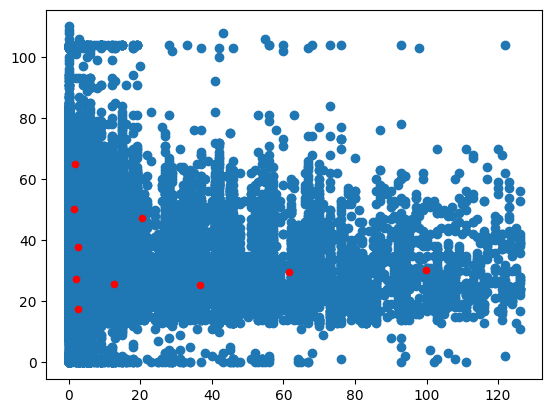

In [94]:
kmeans = KMeans(init="random",n_clusters=10,n_init=10,max_iter=300,random_state=42)

model = kmeans.fit_predict(X)

print(model)

plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=20,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()
 


#print(model.labels_)

